In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_raw = pd.read_csv(
    '../data/housing_data.csv',
    parse_dates=['period_begin', 'period_end'],
    dtype={'total_homes_sold':'Int32', 'region_name':'category'}
)

In [3]:
ca_housing = (
    housing_raw
    .loc[housing_raw['region_name'].str.contains('CA')]
    .assign(region_name = housing_raw['region_name'].str[0:-11])
    .set_index('period_begin')
)

In [4]:
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2020-06-22,Sacramento,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
2018-09-03,Nevada,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
2017-06-05,Stanislaus,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
2020-01-20,Tehama,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
2017-11-13,Stanislaus,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [7]:
ad_dual = (
    ca_housing
    .loc[ca_housing['region_name'] == 'San Diego', ['inventory', 'median_active_list_price']]
    .sort_index()
)

ad_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


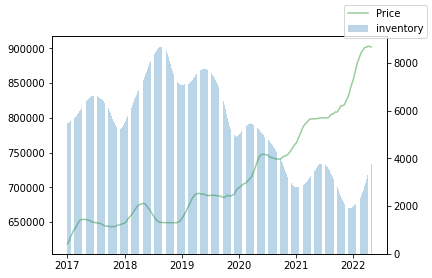

In [13]:
fig, ax = plt.subplots()

width = 5

ax.plot(
    ad_dual['median_active_list_price'],
    color = 'green',
    alpha = .4,
    label = 'Price'
)

# ax.legend()

ax2 = ax.twinx()

ax2.bar(
    ad_dual.index,
    ad_dual['inventory'],
    width=width,
    alpha = .3,
    label = 'inventory'
)

# ax2.legend()

fig.legend()

plt.show()

In [14]:
sd_dual2 = ad_dual.resample('Y').mean()

sd_dual2.head()

,inventory,median_active_list_price
period_begin,,
2017-12-31,5986.730769,645314.217308
2018-12-31,7438.433962,658434.637736
2019-12-31,6794.538462,685614.486538
2020-12-31,4494.076923,735517.426923
2021-12-31,2975.961538,803811.036538


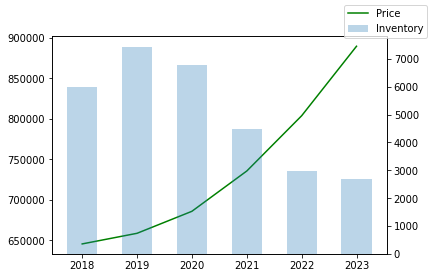

In [17]:
fig, ax = plt.subplots()

ax.plot(
    sd_dual2.index,
    sd_dual2['median_active_list_price'],
    color = 'green',
    label = 'Price'
)

ax2 = ax.twinx()

ax2.bar(
    sd_dual2.index,
    sd_dual2['inventory'],
    width=200,
    label = 'Inventory',
    alpha = 0.3
)

fig.legend()

plt.show()